In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv(r"C:\Users\shrut\Desktop\Data Glacier Stuff\Clean_file.csv")
data.head() 

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,0,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,2,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,0
2,P3,Non-Persistent,Female,Caucasian,Hispanic,Midwest,1,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,1,0,0,0,0,0,0,0,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,0,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,0,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,1


In [3]:
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

In [4]:
def calcula_metricas(confmat):
    
    tn, fp, fn, tp = confmat.ravel()

    acc = (tp+tn)/(tn + fp + fn + tp)
    sen = tp/(tp+fn)
    esp = tn/(tn+fp)
    ppv = tp/(tp+fp)
    fsc = 2*(sen*ppv/(sen+ppv))

    print('ACC: ', acc)
    print('SEN: ', sen)
    print('ESP: ', esp)
    print('PPV: ', ppv)
    print('FSC: ', fsc)
    
    plt.bar(range(5),[acc,sen,esp,ppv,fsc])
    plt.xticks(range(5),['ACC','SEN','ESP','PPV','FSC'])
    plt.plot([-1, 6], [1, 1], color=(0.6, 0.6, 0.6), linestyle='--')
    plt.xlim((-0.5,4.5))
    plt.ylim((0,1.1))
    plt.title('Metricas')
    plt.show()

In [5]:
data = pd.read_csv(r"C:\Users\shrut\Desktop\Data Glacier Stuff\Clean_file.csv")
data.head().T

,0,1,2,3,4
Ptid,P1,P2,P3,P4,P5
Persistency_Flag,Persistent,Non-Persistent,Non-Persistent,Non-Persistent,Non-Persistent
Gender,Male,Male,Female,Female,Female
Race,Caucasian,Asian,Caucasian,Caucasian,Caucasian
Ethnicity,Not Hispanic,Not Hispanic,Hispanic,Not Hispanic,Not Hispanic
Region,West,West,Midwest,Midwest,Midwest
Age_Bucket,0,2,1,0,0
Ntm_Speciality,GENERAL PRACTITIONER,GENERAL PRACTITIONER,GENERAL PRACTITIONER,GENERAL PRACTITIONER,GENERAL PRACTITIONER
Ntm_Specialist_Flag,Others,Others,Others,Others,Others
Ntm_Speciality_Bucket,OB/GYN/Others/PCP/Unknown,OB/GYN/Others/PCP/Unknown,OB/GYN/Others/PCP/Unknown,OB/GYN/Others/PCP/Unknown,OB/GYN/Others/PCP/Unknown


In [6]:
data['Persistency_Flag'].value_counts() / data.shape[0]

Non-Persistent    0.62354
Persistent        0.37646
Name: Persistency_Flag, dtype: float64

In [7]:
data.dtypes

Ptid                                                                   object
Persistency_Flag                                                       object
Gender                                                                 object
Race                                                                   object
Ethnicity                                                              object
Region                                                                 object
Age_Bucket                                                              int64
Ntm_Speciality                                                         object
Ntm_Specialist_Flag                                                    object
Ntm_Speciality_Bucket                                                  object
Gluco_Record_Prior_Ntm                                                  int64
Gluco_Record_During_Rx                                                  int64
Dexa_Freq_During_Rx                                             

In [8]:
data['Ptid'].value_counts

<bound method IndexOpsMixin.value_counts of 0          P1
1          P2
2          P3
3          P4
4          P5
5          P6
6          P7
7          P8
8          P9
9         P10
10        P11
11        P12
12        P13
13        P14
14        P15
15        P16
16        P17
17        P18
18        P19
19        P20
20        P21
21        P22
22        P23
23        P24
24        P25
25        P26
26        P27
27        P28
28        P29
29        P30
30        P31
31        P32
32        P33
33        P34
34        P35
35        P36
36        P37
37        P38
38        P39
39        P40
40        P41
41        P42
42        P43
43        P44
44        P45
45        P46
46        P47
47        P48
48        P49
49        P50
50        P51
51        P52
52        P53
53        P54
54        P55
55        P56
56        P57
57        P58
58        P59
59        P60
60        P61
61        P62
62        P63
63        P64
64        P65
65        P66
66        P67
67        P68
68  

In [9]:
data = data.drop(['Ptid'], axis=1)
data.head().T

,0,1,2,3,4
Persistency_Flag,Persistent,Non-Persistent,Non-Persistent,Non-Persistent,Non-Persistent
Gender,Male,Male,Female,Female,Female
Race,Caucasian,Asian,Caucasian,Caucasian,Caucasian
Ethnicity,Not Hispanic,Not Hispanic,Hispanic,Not Hispanic,Not Hispanic
Region,West,West,Midwest,Midwest,Midwest
Age_Bucket,0,2,1,0,0
Ntm_Speciality,GENERAL PRACTITIONER,GENERAL PRACTITIONER,GENERAL PRACTITIONER,GENERAL PRACTITIONER,GENERAL PRACTITIONER
Ntm_Specialist_Flag,Others,Others,Others,Others,Others
Ntm_Speciality_Bucket,OB/GYN/Others/PCP/Unknown,OB/GYN/Others/PCP/Unknown,OB/GYN/Others/PCP/Unknown,OB/GYN/Others/PCP/Unknown,OB/GYN/Others/PCP/Unknown
Gluco_Record_Prior_Ntm,0,0,0,0,1


In [10]:
data.select_dtypes(include=object).columns

Index(['Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Ntm_Speciality', 'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket',
       'Change_T_Score', 'Change_Risk_Segment', 'Adherent_Flag'],
      dtype='object')

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Persistency_Flag'] = le.fit_transform(data['Persistency_Flag'])
data['Gender'] = le.fit_transform(data['Gender'])
data['Race'] = le.fit_transform(data['Race'])
data['Ethnicity'] = le.fit_transform(data['Ethnicity'])
data['Region'] = le.fit_transform(data['Region'])
data['Ntm_Speciality'] = le.fit_transform(data['Ntm_Speciality'])
data['Ntm_Specialist_Flag'] = le.fit_transform(data['Ntm_Specialist_Flag'])
data['Ntm_Speciality_Bucket'] = le.fit_transform(data['Ntm_Speciality_Bucket'])
data['Adherent_Flag'] = le.fit_transform(data['Adherent_Flag'])
data.head()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,1,1,2,1,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,3,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,0,0,2
3,0,0,2,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1


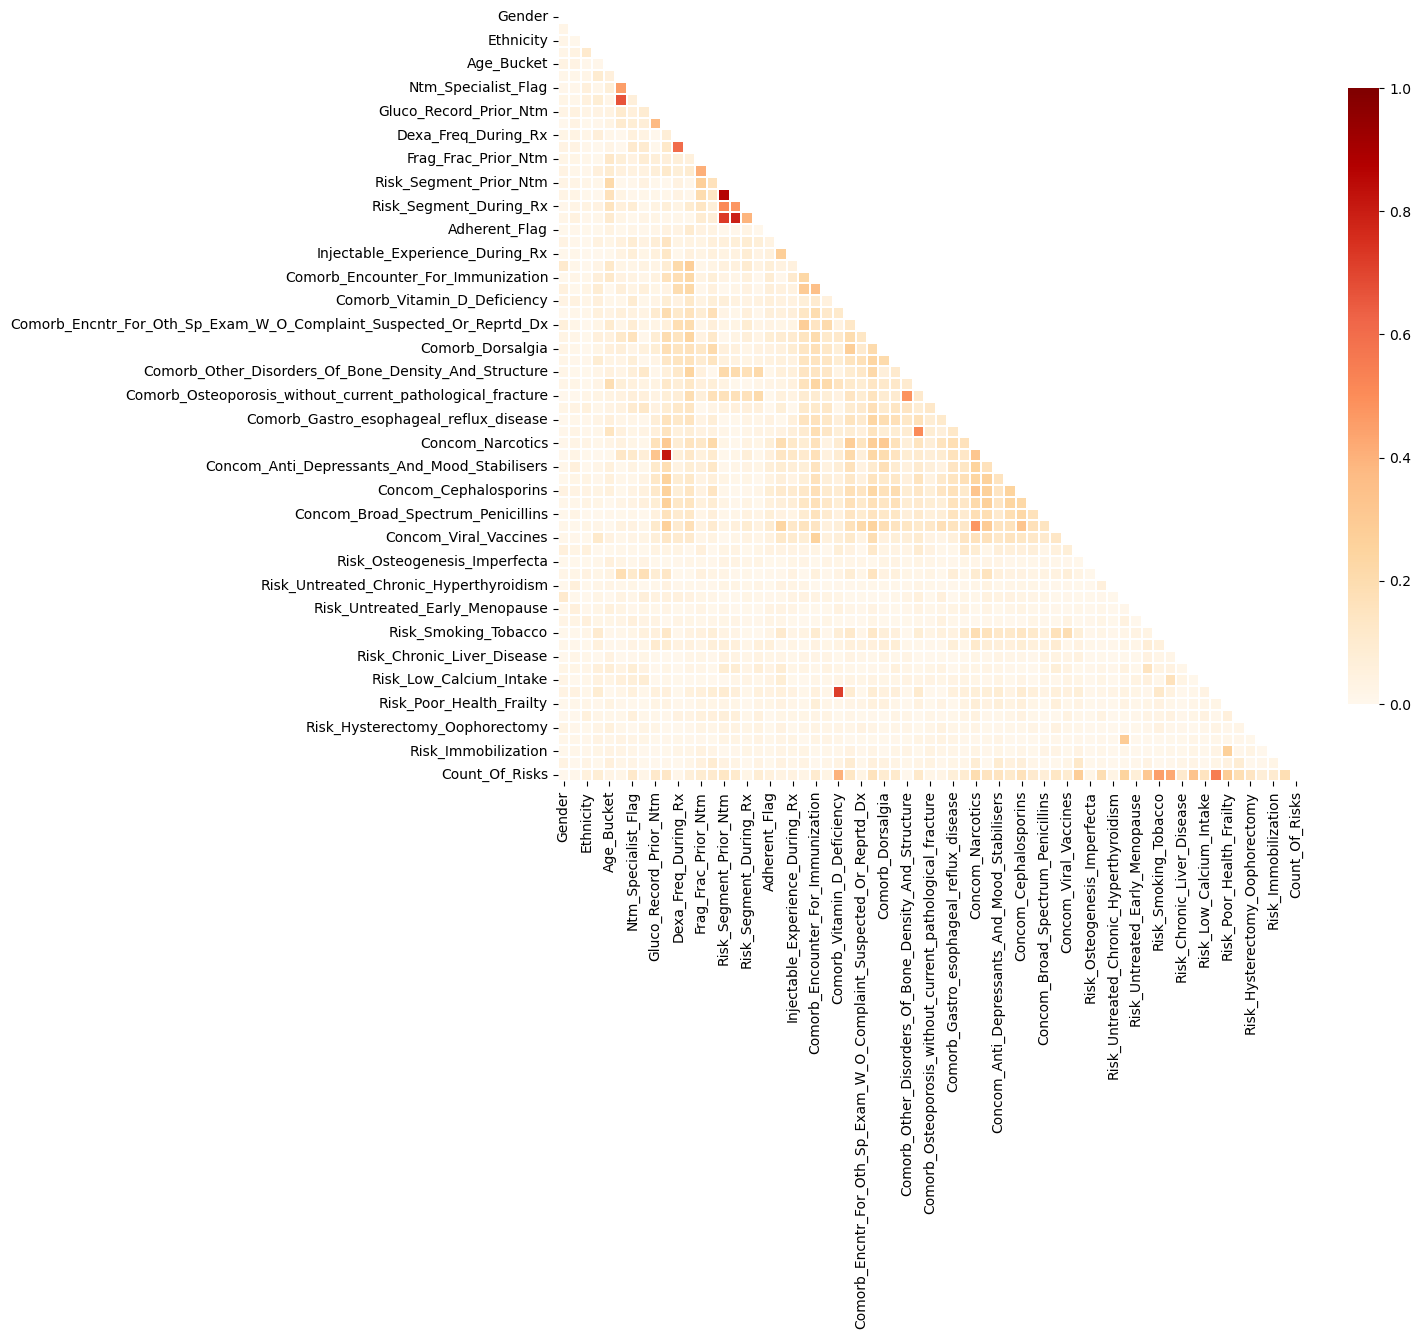

In [19]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(data.drop(['Persistency_Flag'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="OrRd", cbar_kws={"shrink": .8})

plt.show()

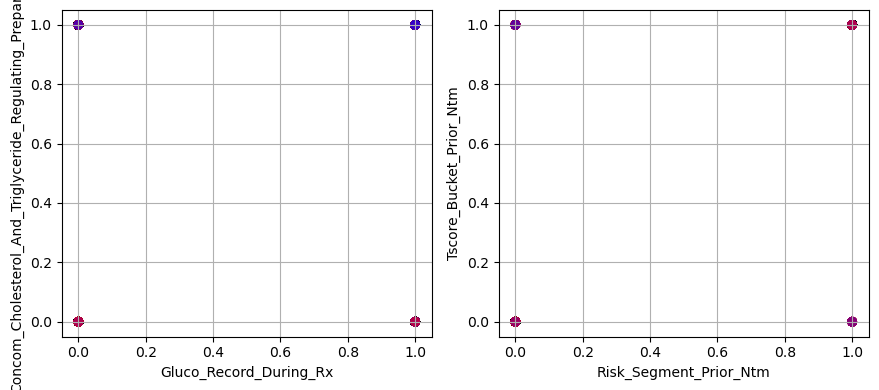

In [13]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
pairs = np.where(upper>0.8)
fx = data.columns[pairs[0]]
fy =  data.columns[pairs[1]]

i=1
plt.figure(figsize=(22,4))
for f1,f2 in zip(fx,fy):
    
    plt.subplot(1,5,i)
    
    plt.scatter(data[f1],data[f2], c=data['Persistency_Flag'],cmap=cm_bright, alpha=0.25)
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.grid()
    plt.tight_layout()
    
    i+=1
    
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = data.columns.drop(['Persistency_Flag', 'Change_T_Score','Change_Risk_Segment','Adherent_Flag'])

X = data[features].values
y = data['Persistency_Flag'].astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify = y, random_state=0)

scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

print('Trained Data: ', Xs_train.shape)
print('Test Data:  ', Xs_test.shape)

print('Trained proportion:%0.3f'%np.mean(y_train))
print('Test proportion: %0.3f'%np.mean(y_test))

Trained Data:  (2396, 64)
Test Data:   (1028, 64)
Trained proportion:0.376
Test proportion: 0.376


best mean cross-validation score: 0.783
best parameters: {'max_depth': 3}


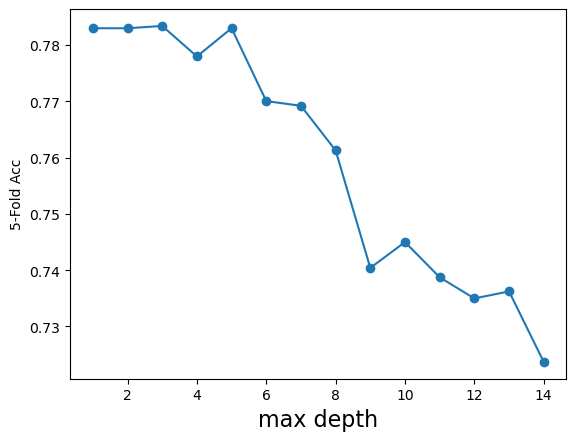

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }

grid = GridSearchCV(DecisionTreeClassifier(), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

**In EDA presentation, Max Depth was mentioned at 1. It stands corrected now at 3.

In [16]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeClassifier(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

Train:  0.7925709515859767
Test:  0.8025291828793775


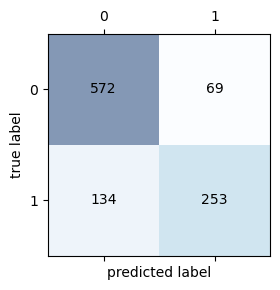

              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       641
         1.0       0.79      0.65      0.71       387

    accuracy                           0.80      1028
   macro avg       0.80      0.77      0.78      1028
weighted avg       0.80      0.80      0.80      1028



In [17]:
y_test_pred = treeModel.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
confmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(confmat)
print(classification_report(y_test, y_test_pred))